In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import files
import statistics as stat
uploaded = files.upload()

Saving example1.csv to example1.csv


In [0]:
def mean_point(data, beg, end):
  size=(end-beg)*2
  new_data=np.zeros((size))

  for i in range(size//2):
    new_data[2*i]=data[2*(beg+i)]
    new_data[2*i+1]=data[2*(beg+i)+1]

  mean_x=stat.mean(new_data[::2])
  mean_y=stat.mean(new_data[1::2])
  
  return mean_x, mean_y

# Approximated Linear Line Coefficients (allc)
# data is 2D array of points
# [x0, y0, x1, y1, ..., xn, yn]
def get_allc(data, beg=None, end=None):
  if beg==None:
    beg=0
  if end==None or end>(len(data)-1)//2:
    end=(len(data)-1)//2

  s_xy=0
  s_x=0
  s_y=0
  s_x2=0
  n=end-beg+1

  for i in range(n):
    s_xy+=data[2*(beg+i)]*data[2*(beg+i)+1]
    s_x+=data[2*(beg+i)]
    s_y+=data[2*(beg+i)+1]
    s_x2+=data[2*(beg+i)]**2
  
  b=(s_y*s_x2-s_xy*s_x)/(n*s_x2-s_x**2)
  a=s_xy/s_x2-b*s_x/(s_x2)

  # print("sum xy:",s_xy)
  # print("sum x:",s_x)
  # print("sum y:",s_y)
  # print("sum x^2:",s_x2)
  # print("n:",n)

  return a, b

# y=ax+b
def plot_line(a, b, beg=0, end=1):
  # print("beg:",beg," and end:",end)
  step=(end-beg)/100
  x=np.arange(beg, end, step)
  y=a*x+b
  plt.plot(x, y, '-g');

def linear_regression(data, beg, end, print=None, title=None):
  a, b = get_allc(data, beg, end)
  
  if beg<0:
    beg=0
  if end>(len(data)-1)//2:
    end=(len(data)-1)//2
  if print!=None:
    print("y=",a,"x+",b)
  if title!=None:
    plt.title(title)
  
  plt.xlabel("x")
  plt.ylabel("y")
  plt.plot(data[::2], data[1::2], '.b');
  plot_line(a, b, data[2*beg], data[2*end])


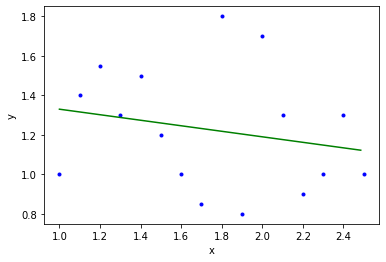

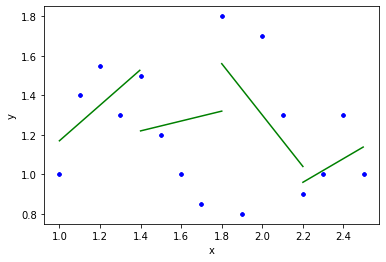

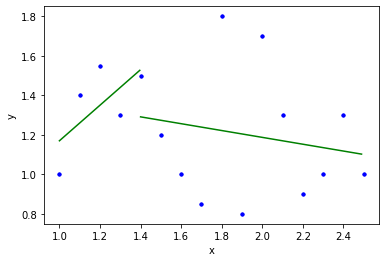

In [0]:
df=pd.read_csv("example2.csv", header=None, names=["x", "y"])
df

raw_data=df.values.tolist()
data=[]

for i in raw_data:
  data.append(i[0])
  data.append(i[1])

linear_regression(data, 0, 15)
plt.show()

for i in range(4):
  linear_regression(data, 4*i, 4*(i+1))
plt.show()

linear_regression(data, 0, 4)
linear_regression(data, 4, 15)
plt.show()